<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/02_01_basic_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [4]:
img = "bird.png"
url = f"{base}{img}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  266k  100  266k    0     0  1286k      0 --:--:-- --:--:-- --:--:-- 1292k


In [42]:
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

In [43]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

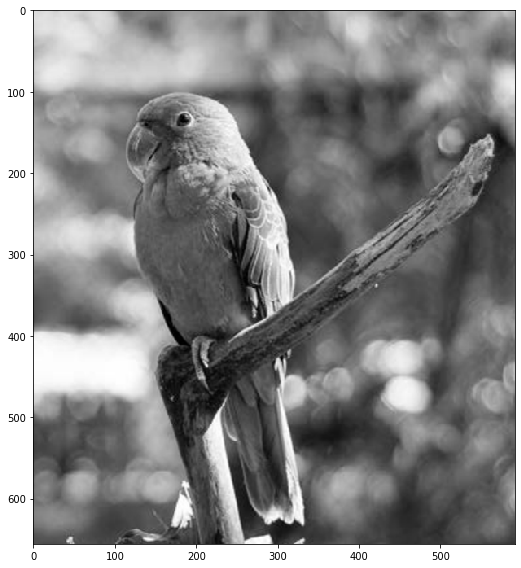

In [44]:
im = loadImg(img)
show(im)

## Operador Inverso

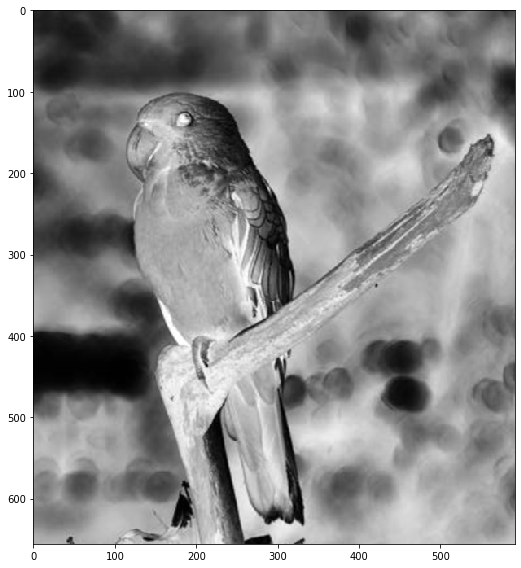

In [45]:
show(255 - im)

## Umbral

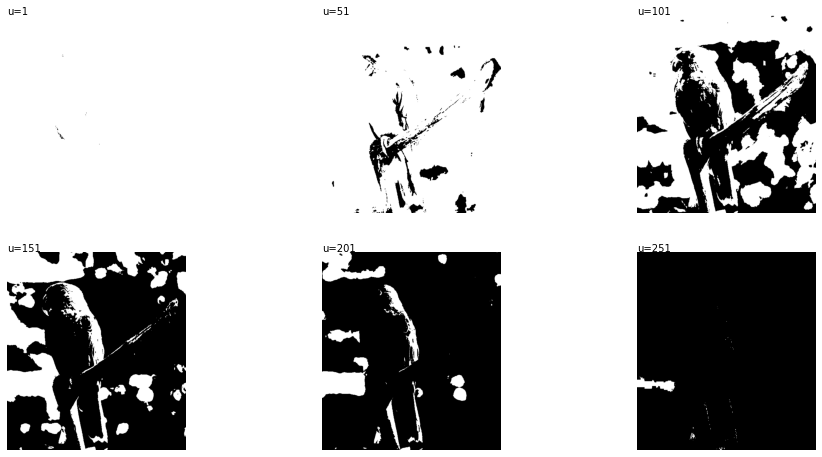

In [63]:
fig = plt.figure(figsize=(16, 8))
i = 1
for u in range(1, 255, 50):
  a = fig.add_subplot(2, 3, i)
  i += 1
  plt.axis('off')
  im = loadImg(img)
  im[im > u] = 255
  im[im <= u] = 0
  plt.imshow(im)
  plt.text(0, 0, f"u={u}")
plt.show()